# Manual KPI Analysis

Load KPI data from CSV for manual exploration.

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt

import pandas as pd

In [2]:
# Try common relative locations so the notebook works from repo root or analysis folder.
from copy import copy

potential_paths = [
    Path("analysis") / "tables" / "kpis.csv",
    Path("tables") / "kpis.csv",
    Path("..") / "analysis" / "tables" / "kpis.csv",
]
for candidate in potential_paths:
    if candidate.exists():
        csv_path = candidate.resolve()
        break
else:
    raise FileNotFoundError("Could not locate analysis/tables/kpis.csv from current working directory.")
df_raw = pd.read_csv(csv_path)

In [3]:
df = copy(df_raw)

# Make 'confid_id' row be the header 
df.columns = df.iloc[0]
df = df[1:]

# Rename columns. dial-efficiency -> E, dials-balanced -> B, dials-fairness -> F, dials-adequacy -> A, dials-fairness-adequacy -> FA
df = df.rename(columns={"config_id": "KPI"})

# Make 'config_id' be the index
df = df.set_index("KPI")

# Remove row 'kpi'
df = df[df.index != "kpi"]

# Convert KPI values to numeric so plotting uses continuous axes
df = df.apply(pd.to_numeric, errors="coerce")

# Name header (column names) as 'Dials Config'
df.columns.name = "Dials Config"

df.round(2)

configs_to_plot = ["dials-adequacy", "dials-allocation-equity", "dials-efficiency", "dials-balanced", "dials-equity-adequacy", "dials-hierarchical"]

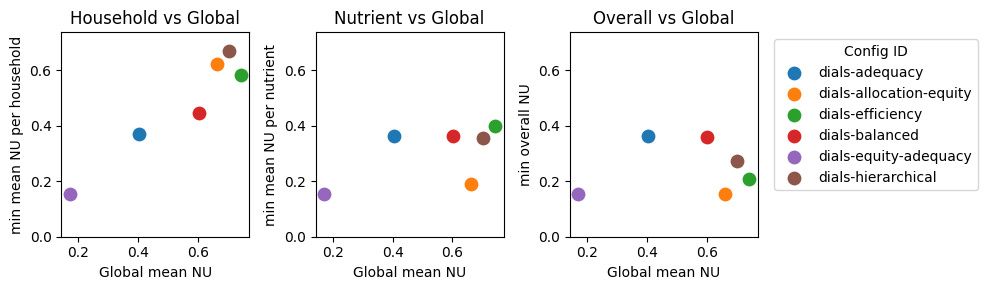

In [4]:
# Plot global vs minima KPIs (mean nutritional utilities)

def plot_global_vs_minima(df: pd.DataFrame) -> None:
    label_map = {
        "Global mean nutritional utility": "Global mean NU",
        "Min mean nutritional utility per household": "min mean NU per household",
        "Min mean nutritional utility per nutrient": "min mean NU per nutrient",
        "Min overall nutritional utility": "min overall NU",
    }
    label_map_title = {
        "Global mean nutritional utility": "Global",
        "Min mean nutritional utility per household": "Household",
        "Min mean nutritional utility per nutrient": "Nutrient",
        "Min overall nutritional utility": "Overall",
    }

    required_index = list(label_map.keys())
    missing = [k for k in required_index if k not in df.index]
    if missing:
        raise KeyError(f"Missing KPI rows in dataframe: {missing}")
    scenarios = df.columns.tolist()
    colors = plt.cm.tab10(range(len(scenarios)))  # consistent palette for config IDs
    x_values = df.loc["Global mean nutritional utility"]
    fig, axes = plt.subplots(1, 3, figsize=(10, 3), sharex=False, sharey=False)
    targets = [
        "Min mean nutritional utility per household", #"min mean NU per household",
        "Min mean nutritional utility per nutrient", #"Min mean NU per nutrient",
        "Min overall nutritional utility", #"Min overall NU",
    ]
    max_y = df.loc[targets].max().max()
    for ax, target in zip(axes, targets):
        y_values = df.loc[target]
        for scenario, color in zip(scenarios, colors):
            ax.scatter(
                x_values[scenario],
                y_values[scenario],
                color=color,
                s=80,
                label=scenario,
            )
        ax.set_xlabel(label_map["Global mean nutritional utility"])
        ax.set_ylabel(label_map[target])
        ax.set_title(f"{label_map_title[target]} vs Global")
        ax.set_ylim(0, max_y * 1.1)
    handles, labels = axes[0].get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    axes[2].legend(
        by_label.values(),
        by_label.keys(),
        title="Config ID",
        bbox_to_anchor=(1.05, 1), #(1.02, 1)
        loc="upper left",
    )
    fig.tight_layout()
    plt.show()

plot_global_vs_minima(df.loc[:, configs_to_plot])

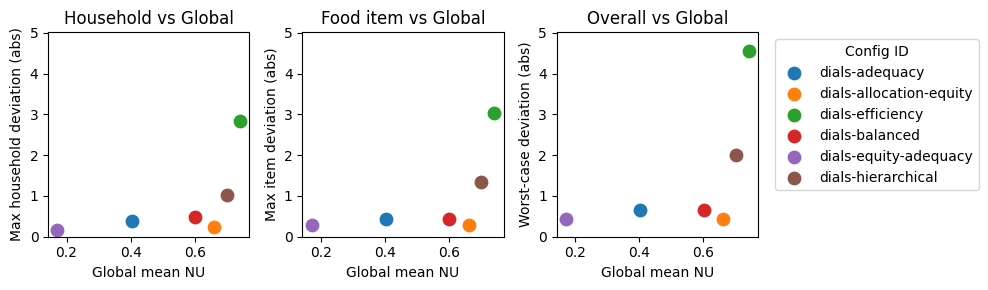

In [5]:
# Plot allocation equity KPIs (absolute deviation metrics)

def plot_allocation_equity_absolute(df: pd.DataFrame) -> None:
    label_map = {
        "Global mean nutritional utility": "Global mean NU",
        "Max household mean deviation (abs)": "Max household deviation (abs)",
        "Max item mean deviation (abs)": "Max item deviation (abs)",
        "Worst-case deviation (abs)": "Worst-case deviation (abs)",
    }
    label_map_title = {
        "Global mean nutritional utility": "Global",
        "Max household mean deviation (abs)": "Household",
        "Max item mean deviation (abs)": "Food item",
        "Worst-case deviation (abs)": "Overall",
    }
    required_index = list(label_map.keys())
    missing = [metric for metric in required_index if metric not in df.index]
    if missing:
        raise KeyError(f"Missing allocation equity KPI rows in dataframe: {missing}")
    scenarios = df.columns.tolist()
    colors = plt.cm.tab10(range(len(scenarios)))
    x_values = df.loc["Global mean nutritional utility"]
    fig, axes = plt.subplots(1, 3, figsize=(10, 3), sharex=False, sharey=False)
    targets = [
        "Max household mean deviation (abs)",
        "Max item mean deviation (abs)",
        "Worst-case deviation (abs)",
    ]
    max_y = df.loc[targets].max().max()
    for ax, target in zip(axes, targets):
        y_values = df.loc[target]
        for scenario, color in zip(scenarios, colors):
            ax.scatter(
                x_values[scenario],
                y_values[scenario],
                color=color,
                s=80,
                label=scenario,
            )
        ax.set_xlabel(label_map["Global mean nutritional utility"])
        ax.set_ylabel(label_map[target])
        ax.set_title(f"{label_map_title[target]} vs Global")
        ax.set_ylim(0, max_y * 1.1)
    handles, labels = axes[0].get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    axes[2].legend(
        by_label.values(),
        by_label.keys(),
        title="Config ID",
        bbox_to_anchor=(1.05, 1),
        loc="upper left",
    )
    fig.tight_layout()
    plt.show()

plot_allocation_equity_absolute(df.loc[:, configs_to_plot])

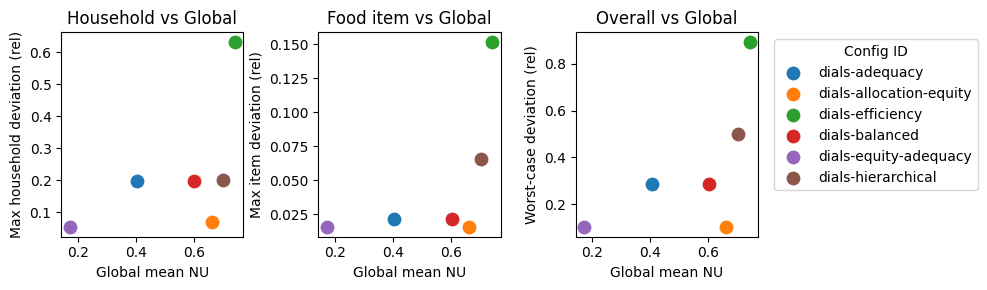

In [6]:
# Plot allocation equity KPIs (relative deviation metrics)

def plot_allocation_equity_relative(df: pd.DataFrame) -> None:
    label_map = {
        "Global mean nutritional utility": "Global mean NU",
        "Max household deviation (rel)": "Max household deviation (rel)",
        "Max item deviation (rel)": "Max item deviation (rel)",
        "Worst-case deviation (rel)": "Worst-case deviation (rel)",
    }
    label_map_title = {
        "Global mean nutritional utility": "Global",
        "Max household deviation (rel)": "Household",
        "Max item deviation (rel)": "Food item",
        "Worst-case deviation (rel)": "Overall",
    }
    required_index = list(label_map.keys())
    missing = [metric for metric in required_index if metric not in df.index]
    if missing:
        raise KeyError(f"Missing allocation equity KPI rows in dataframe: {missing}")
    scenarios = df.columns.tolist()
    colors = plt.cm.tab10(range(len(scenarios)))
    x_values = df.loc["Global mean nutritional utility"]
    fig, axes = plt.subplots(1, 3, figsize=(10, 3), sharex=False, sharey=False)
    targets = [
        "Max household deviation (rel)",
        "Max item deviation (rel)",
        "Worst-case deviation (rel)",
    ]
    for ax, target in zip(axes, targets):
        y_values = df.loc[target]
        for scenario, color in zip(scenarios, colors):
            ax.scatter(
                x_values[scenario],
                y_values[scenario],
                color=color,
                s=80,
                label=scenario,
            )
        ax.set_xlabel(label_map["Global mean nutritional utility"])
        ax.set_ylabel(label_map[target])
        ax.set_title(f"{label_map_title[target]} vs Global")
    handles, labels = axes[0].get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    axes[2].legend(
        by_label.values(),
        by_label.keys(),
        title="Config ID",
        bbox_to_anchor=(1.05, 1),
        loc="upper left",
    )
    fig.tight_layout()
    plt.show()

plot_allocation_equity_relative(df.loc[:, configs_to_plot])